In [ ]:
#unresolved how to use credible intervals


<h6>multinomial and dirichlet</h6>
<p>
dirichlet is the prior for multinomial distributions where multinomial data is 
encoded to be successes and failures like bernoulli but with K categories. 
$$
f(x_1,x_2,...x_k, \alpha_1,\alpha2,...\alpha_k) = \frac{\Gamma(\sum_1^{k}\alpha_i)}{\prod_1^k(\Gamma(\alpha_i))} \prod_1^{k}(x_i^{(\alpha_i-1)})
$$
</p>


In [2]:
rdirichlet <- function(a) {
    y <- rgamma(length(a), a, 1)
    return(y / sum(y))
}

x <- c(65, 71, 532, 307, 369, 234, 584)

SIMS <- 10000

t <- matrix(nrow = SIMS, ncol = length(x), data = 0)

for (i in 1:SIMS) t[i,] = rdirichlet(x + 1)

sum(t[,3]) / SIMS # estimate of "college or grad"

quantile(t[,3], probs = c(0.025, 0.975)) # credible interval for "college or grad"

# posterior probabilities
sum(t[,3] > t[,7]) / SIMS # more "college or grad" than "other"
sum(t[,1] > t[,2]) / SIMS # more "k-12 teacher or librarian" than "k-12 student"

SyntaxError: invalid syntax (2785335761.py, line 1)

In [ ]:
https://stats.stackexchange.com/questions/39319/bayesian-user-survey-with-a-credible-interval

In [10]:
# pip install numpy
#https://gist.github.com/tingletech/3928539
#bayesian survey analysis port from R code
from numpy.random.mtrand import dirichlet
from numpy import array, sum, percentile

categories = [
    'k-12 teacher or librarian',
    'k-12 student',
    'college or graduate student',
    'faculty or academic researcher',
    'archivist or librarian',
    'genealogist or family researcher',
    'other'
]

observations = [65, 71, 532, 307, 369, 234, 584]
print("sum:",sum(observations))
# just checking
assert len(categories) == len(observations)

# run 1000 simulations
simulations = 1000

# set up a standard library array to hold the simulation results
results = []

# monte carlo method
for n in range(simulations):
    results.append( dirichlet([x+1 for x in observations]) )

# convert results to a numpy array for better indexing/sums
results = array(results)
print("results:",results.shape)
# calculate estimates
estimates = sum(results, axis=0) / simulations

# calculate credible interval and print results
for k in range(len(observations)):
    q025 = "{:.0%}".format(percentile(results[:,k],  2.5))
    q975 = "{:.0%}".format(percentile(results[:,k], 97.5))
    percent = "{:.0%}".format(estimates[k])
    print (categories[k], q025, percent, q975)

sum: 2162
results: (1000, 7)
k-12 teacher or librarian 2% 3% 4%
k-12 student 3% 3% 4%
college or graduate student 23% 25% 26%
faculty or academic researcher 13% 14% 16%
archivist or librarian 15% 17% 19%
genealogist or family researcher 10% 11% 12%
other 25% 27% 29%


SystemExit: 0

/Users/dougchang/miniconda3/envs/cosmic/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


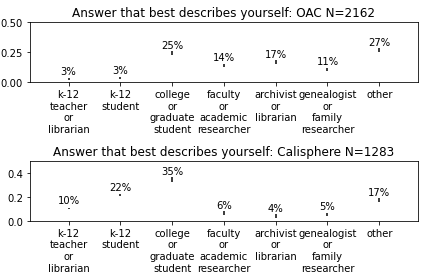

In [2]:
#plotting credible intervals using montecarlo sampling

import sys
from numpy.random.mtrand import dirichlet
from numpy import array, sum, percentile
from pprint import pprint
import numpy as np

def main(argv=None):
    # need to refactor the data out
    categories = [
        'k-12 teacher or librarian',
        'k-12 student',
        'college or graduate student',
        'faculty or academic researcher',
        'archivist or librarian',
        'genealogist or family researcher',
        'other'
    ]
    observations_oac = [ 65,  71, 532, 307, 369, 234, 584]
    observations_cs  = [133, 280, 445,  82,  55,  68, 220]

    # calculate the statistics
    estimates_oac, error_bars_oac = monte_carlo(observations_oac)
    estimates_cs, error_bars_cs = monte_carlo(observations_cs)

    # http://matplotlib.org/examples/api/barchart_demo.html
    # inner function we will need for labels
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height() 
            height_format = "{:.0%}".format(height)
            plt.text(rect.get_x()+rect.get_width()/2., height + 0.025, height_format,
                    ha='center', va='bottom')

    # okay, now we are ready to get our plot on
    import matplotlib
    # The backend must be set BEFORE importing matplotlib.pyplot
    # matplotlib.use('Agg') # Generates image.
    import matplotlib.pyplot as plt

    # x axis index
    x = np.arange(1, len(categories)+1)

    plt.figure(1)
    plt.subplot(211)
    plt.title("Answer that best describes yourself: OAC N=" + str(sum(observations_oac)))
    plt.xticks(x, [label.replace(" ","\n") for label in categories ])
    plt.ylim((0,0.5))
    rects1 = plt.bar(x, estimates_oac, 0.8, yerr=error_bars_oac, facecolor='none', align='center', ecolor="k" )
    autolabel(rects1)

    plt.subplot(212)
    plt.title("Answer that best describes yourself: Calisphere N=" + str(sum(observations_cs)))
    plt.xticks(x, [label.replace(" ","\n") for label in categories ])
    plt.ylim((0,0.5))
    rects2 = plt.bar(x, estimates_cs, 0.8, yerr=error_bars_oac, facecolor='none', align='center', ecolor="k" )
    autolabel(rects2)

    plt.tight_layout()
    plt.savefig("figure.png", dpi = (100))
    # http://workshops.arl.arizona.edu/python1/python_modules/matplotlib_example.py
    return 0

def monte_carlo(observations):
    """ takes a standard array of observations and returns a 2 dimensional numpy array of simulation results
    """
    ITERATIONS = 1000
    results = []
    for n in range(ITERATIONS):
        results.append( dirichlet([x+1 for x in observations]) )
    # convert results to a numby array for better indexing/sums
    results = array(results)
    # summarize the results 
    estimates = sum(results, axis=0) / ITERATIONS
    # "You need 2*N, not N*2 arrays here."
    lows = []
    highs = []
    # calculate credible interval 
    for k in range(len(estimates)):
        q025 = percentile(results[:,k],  2.5)
        q975 = percentile(results[:,k], 97.5)
        # http://www.mailinglistarchive.com/html/matplotlib-users@lists.sourceforge.net/2009-09/msg00181.html
        lows.append( estimates[k] - q025)
        highs.append( q975 - estimates[k])
    return estimates, [ lows, highs ] 

if __name__ == '__main__':
    status = main()
    sys.exit(status)